# 01 Show Me the Data!

Welcome to the first BCI Essentials tutorial notebook. In this notebook we will explore:

- How to load a previously collected session of BCI data
- How to extract key data, like sampling rate and channel labels
- How to plot EEG data
- How to bandpass filter EEG data

## Requirements
- If you have not already, you will have to install the **ipykernel** package to
run this notebook. You can do this from your terminal with `pip install ipykernel`
- To view interactive plots you need to install **ipyml** with `pip install ipympl`

## Loading a session of data

When BCI data is collected using bci-essentials-python and bci-essentials-unity 
it is saved to a single XDF (.xdf) file. Each file consists of multiple 
"streams". One stream contains EEG data from the headset. Another stream 
contains marker data from Unity telling us what stimulus or feedback was given. 
Another stream includes the BCI selections made by the Python backend.

We will initialize a data object and load the offline data into it from an XDF 
file. This does the work of extracting all of the available data from the 
streams and storing it in a uniform format for access later on.

In this tutorial we will only focus on the EEG stream.



In [1]:
# Get the path of the file we want to open
# Using the python `os` module to create an OS-agnostic filepath

# Import module
import os  

from bci_essentials.utils.logger import Logger  # Logger wrapper

# Instantiate a logger for the module at the default level of logging.INFO
logger = Logger(name="01_show_me_the_dat")

# Create OS-agnostic path to the folder that holds the example data
# This assumes the tutorial is run from the folder within bci-essentials-python
# that it was original located
example_data_folder_path = os.path.join("..", "examples", "data")

# The filename of the data used in this tutorial
tutorial_filename = "mi_example.xdf"

# Construct the filepath
tutorial_data_filepath = os.path.join(example_data_folder_path, tutorial_filename)

# Log the path to the file used
logger.info(
      "Using data file:\n\t%s\nLocated in the relative path:\n\t%s",
      tutorial_filename,
      tutorial_data_filepath
)

2023-12-12 14:33:20 - INFO - bci_essentials : Using data file:
	mi_example.xdf
Located in the relative path:
	..\examples\data\mi_example.xdf


EEG samples, timestamps, and metadata can be accessed by creating an XDF EEG source class and passing it the file path that we just constructed.

In [2]:
# Import the XDF EEG source class
from bci_essentials.io.xdf_sources import XdfEegSource

eeg_source = XdfEegSource(tutorial_data_filepath)

[eeg_samples, eeg_timestamps] = eeg_source.get_samples()
num_channels = eeg_source.num_channels
fsample = eeg_source.fsample
channel_labels = eeg_source.channel_labels
channel_types = eeg_source.channel_types
channel_units = eeg_source.channel_units

# Check that it worked by logging the channel labels and sampling rate
logger.info("The number of channels is: %s", num_channels)
logger.info("The sampling rate is: %s", fsample)
logger.info("The channel labels are: %s", channel_labels)
logger.info("The channel types are: %s", channel_types)
logger.info("The channel units are: %s", channel_units)


2023-12-12 14:33:21 - INFO - bci_essentials : The number of channels is: 16
2023-12-12 14:33:21 - INFO - bci_essentials : The sampling rate is: 256.0
2023-12-12 14:33:21 - INFO - bci_essentials : The channel labels are: ['FC3', 'FCz', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'Pz']
2023-12-12 14:33:21 - INFO - bci_essentials : The channel types are: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
2023-12-12 14:33:21 - INFO - bci_essentials : The channel units are: ['microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts']


## Plot the EEG Data

Now that we have loaded our EEG data, lets plot it!

But first, lets check to make sure that the sizes of these arrays match.

In [3]:
# Get the shape of the EEG and timestamp arrays
raw_eeg_shape = eeg_samples.shape
logger.info("The shape of the EEG data is: %s", raw_eeg_shape)

raw_timestamps_shape = eeg_timestamps.shape
logger.info("The shape of the EEG timestamps is: %s", raw_timestamps_shape)

# Log the number of channels
logger.info("The number of channels is: %s", num_channels)

2023-12-12 14:33:21 - INFO - bci_essentials : The shape of the EEG data is: (125952, 16)
2023-12-12 14:33:21 - INFO - bci_essentials : The shape of the EEG timestamps is: (125952,)
2023-12-12 14:33:21 - INFO - bci_essentials : The number of channels is: 16


From this we can see that the shape of the first dimension of the array matches
the number of samples and the second dimension matches the number of channels,
which also matches the number of channel labels from earlier!

Now we can create our plot of the EEG data!

2023-12-12 14:33:21 - INFO - bci_essentials : bci_data.ch_type: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
2023-12-12 14:33:21 - INFO - bci_essentials : bci_data.ch_units: ['microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts', 'microvolts']


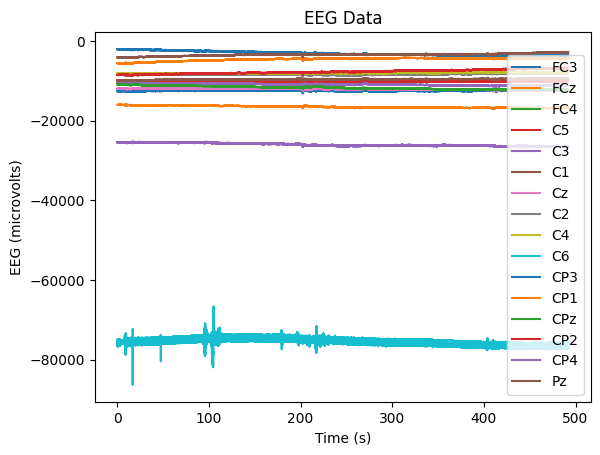

In [4]:
import matplotlib.pyplot as plt

# Find out which channels contain EEG data, in this case it is all of them
logger.info("bci_data.ch_type: %s", channel_types)

# Get the units for our plot, they are all the same, so set units to "microvolts"
logger.info("bci_data.ch_units: %s", channel_units)
units = channel_units[0]

# Subtract the initial time from the timestamps to get a time starting at 0
timestamps = eeg_timestamps - eeg_timestamps[0]

# Plot the EEG data
plt.figure()
plt.plot(timestamps, eeg_samples)
plt.xlabel("Time (s)")
plt.ylabel("EEG (" + units + ")")
plt.title("EEG Data")
plt.legend(channel_labels)
plt.show()

Well... technically this does show our EEG data, but not very well. There are a 
few issues left to resolve. Primarily we can see that all of the signals have a 
different DC offset. We also see that the signals have some low frequency drift 
(visible in C6 and CP1).

To handle these issues, lets filter the signal with a bandpass filter using the 
signal processing module. Our main target right now is the low frequencies, so 
we will make a bandpass filter which passes frequencies between 1 and 100 Hz. 

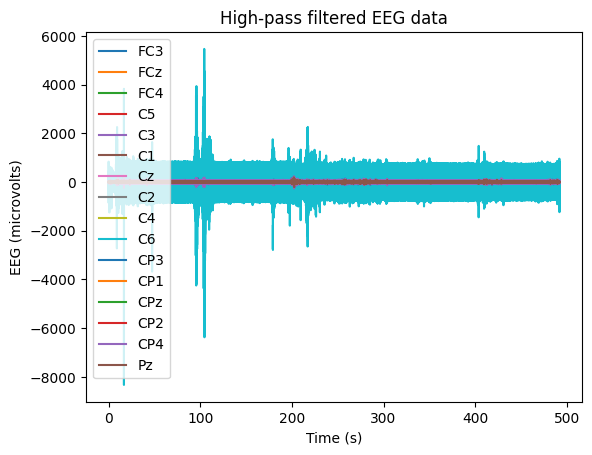

In [5]:
from bci_essentials.signal_processing import bandpass

# Apply the filter to the data, we transposed the the input raw_eeg to match the
# shape that the bandpass function expects. We then transpose the output back.
high_pass_filt_eeg = bandpass(eeg_samples.T, 
              f_low=1, 
              f_high=100, 
              order=5, 
              fsample=fsample).T


# Plot the high pass filtered data
# Plot the EEG data
plt.figure()
plt.plot(timestamps, high_pass_filt_eeg)
plt.xlabel("Time (s)")
plt.ylabel("EEG (" + units + ")")
plt.title("High-pass filtered EEG data")
plt.legend(channel_labels)
plt.show()



This is ... better. We don't have the DC offset anymore and the peaks in C6
aren't quite as prominent.

But we still have lots of noise. We can plot the 
power spectral density of the signal to see where that noise is coming from.

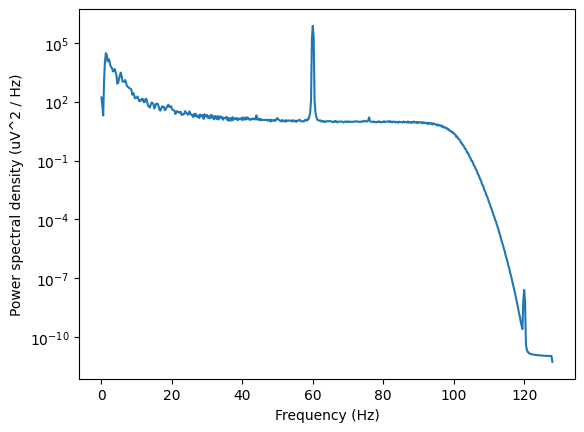

In [6]:
# Plot the PSD of P6

# Import the modules you need
from scipy.signal import welch

# Calculate the PSD of P6 using welch()
freqs, psd = welch(high_pass_filt_eeg[:,9], fs=fsample, nperseg=1024)

# Plot the PSD
plt.semilogy(freqs, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.show()



Ouuuup there it is! This PSD shows us that we are getting a lot of noise at
60Hz because of the 60Hz interference from our 60Hz electrical grid. 
Because we aren't really interested in frequencies above 60 Hz anyway let's
remove this by reselecting the cutoffs of our bandpass filter to be 1-40 Hz.

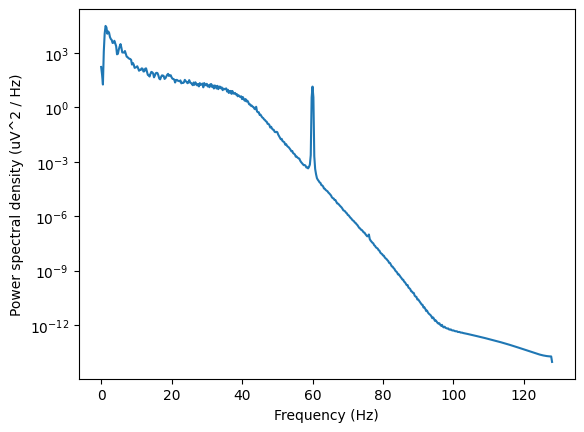

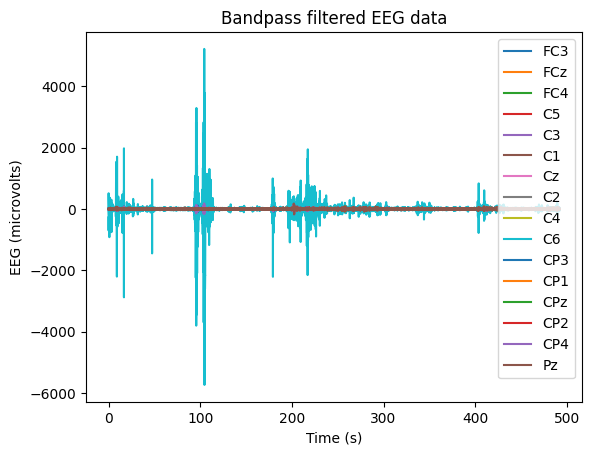

In [7]:
# Apply the filter to the data
bandpass_filt_eeg = bandpass(eeg_samples.T, 
              f_low=1, 
              f_high=40, 
              order=5, 
              fsample=fsample).T

# Use C6 to check that the correct frequencies were removed

# Calculate the PSD of P6 using welch()
bandpass_freqs, bandpass_psd = welch(bandpass_filt_eeg[:,9], fs=fsample, nperseg=1024)

# Plot the PSD
plt.semilogy(bandpass_freqs, bandpass_psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.show()

# Plot the bandpass filtered data
# Plot the EEG data
plt.figure()
plt.plot(timestamps, bandpass_filt_eeg)
plt.xlabel("Time (s)")
plt.ylabel("EEG (" + units + ")")
plt.title("Bandpass filtered EEG data")
plt.legend(channel_labels)
plt.show()

Much better ... well except for C6. Sometimes there is nothing you can do to 
improve the quality of a channel. Let's see what it looks like close up!

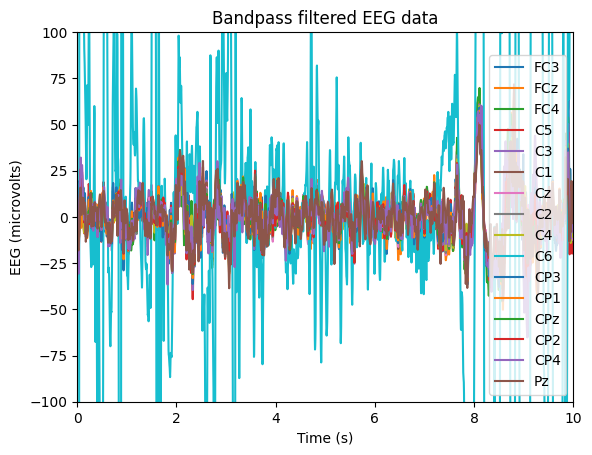

In [8]:
# Plot the bandpass filtered data
# Plot the EEG data
plt.figure()
plt.plot(timestamps, bandpass_filt_eeg)
plt.ylim([-100, 100])
plt.xlim([0, 10])
plt.xlabel("Time (s)")
plt.ylabel("EEG (" + units + ")")
plt.title("Bandpass filtered EEG data")
plt.legend(channel_labels)
plt.show()

What a mess, all of these channels are plotted on top of one another so we can't
see what is going on. To fix this let's add an offset of 50 uV between each 
channel.

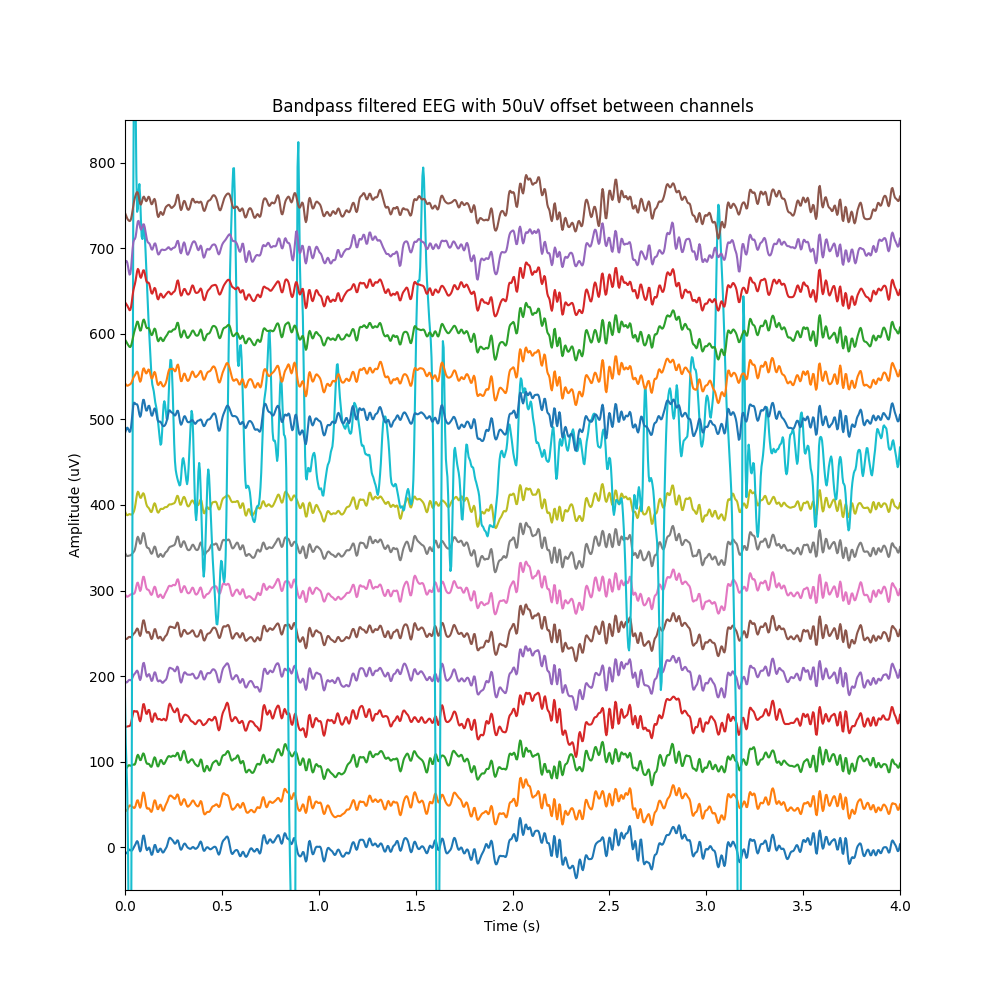

In [9]:
import numpy as np
# Open an interactive matplotlib window in the notebook
%matplotlib widget

# Plot the bandpass_filt_eeg again but with 50uV of offset between each channel
plt.figure(figsize=(10, 10))
plt.plot(timestamps, bandpass_filt_eeg + np.arange(0, 50 * 16, 50))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('Bandpass filtered EEG with 50uV offset between channels')
plt.xlim([0, 4])
plt.ylim([-50, 850])
plt.show()


Et voila!!! We have something that looks like EEG! Pan around the figure (go left and right) and
take a look at the big artifact around 8 seconds. What do you think caused this?
